# Prosper Loans Data Exploration

## Preliminary Wrangling

This document explores a dataset containing information on loans from Prosper Funding LLC (the first peer-to-peer lending marketplace in the United States). This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [169]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [170]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('prosperLoanData.csv')

In [171]:
pd.set_option('display.max_columns', None)

In [172]:
# high-level overview of data shape and composition
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [173]:
df.shape

(113937, 81)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [175]:
# descriptive statistics for numeric variables
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [176]:
df['LoanOriginationDate'].unique()

array(['2007-09-12 00:00:00', '2014-03-03 00:00:00',
       '2007-01-17 00:00:00', ..., '2009-07-23 00:00:00',
       '2008-10-17 00:00:00', '2005-11-15 00:00:00'], dtype=object)

1> ListingCreationDate, ClosedDate, DateCreditPulled, LoanOriginationDate columns are of Object datatype. These columns should be converted to datetime datatype instead of object datatype.

2> Lot of columns have missing values.

3> ListingNumber, LoanNumber should be Object datatype instead of int.

4> Duplicate Listing Numbers. Dropping duplicates - Keeping ones with max Prosper score.

In [177]:
df['ListingCreationDate'] = pd.to_datetime(df['ListingCreationDate'], format='%Y-%m-%d %H:%M:%S.%f')

In [178]:
df['ClosedDate'] = pd.to_datetime(df['ClosedDate'], format='%Y-%m-%d %H:%M:%S')

In [179]:
df['DateCreditPulled'] = pd.to_datetime(df['DateCreditPulled'], format='%Y-%m-%d %H:%M:%S.%f')

In [180]:
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'], format='%Y-%m-%d %H:%M:%S')

In [181]:
df['ListingNumber'] = df['ListingNumber'].astype(str)
df['LoanNumber'] = df['LoanNumber'].astype(str)

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  object        
 2   ListingCreationDate                  113937 non-null  datetime64[ns]
 3   CreditGrade                          28953 non-null   object        
 4   Term                                 113937 non-null  int64         
 5   LoanStatus                           113937 non-null  object        
 6   ClosedDate                           55089 non-null   datetime64[ns]
 7   BorrowerAPR                          113912 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

In [183]:
pd.to_datetime(df.ListingCreationDate).min(), pd.to_datetime(df.ListingCreationDate).max()

(Timestamp('2005-11-09 20:44:28.847000'),
 Timestamp('2014-03-10 12:20:53.760000'))

In [184]:
#Dropping duplicate records for Listings
df.sort_values(by=['ListingNumber', 'ProsperScore'], inplace=True)
df.drop_duplicates(subset=['ListingNumber'],keep='last', inplace=True)

In [185]:
df.shape

(113066, 81)

In [186]:
df.ProsperScore.value_counts()

4.0     12423
6.0     12174
8.0     11988
7.0     10511
5.0      9737
3.0      7517
9.0      6884
2.0      5659
10.0     4716
11.0     1456
1.0       917
Name: ProsperScore, dtype: int64

In [187]:
df.Occupation.value_counts().index

Index(['Other', 'Professional', 'Computer Programmer', 'Executive', 'Teacher',
       'Administrative Assistant', 'Analyst', 'Sales - Commission',
       'Accountant/CPA', 'Clerical', 'Sales - Retail', 'Skilled Labor',
       'Retail Management', 'Nurse (RN)', 'Construction', 'Truck Driver',
       'Laborer', 'Police Officer/Correction Officer', 'Civil Service',
       'Engineer - Mechanical', 'Military Enlisted', 'Food Service Management',
       'Engineer - Electrical', 'Food Service', 'Medical Technician',
       'Attorney', 'Tradesman - Mechanic', 'Social Worker', 'Postal Service',
       'Professor', 'Realtor', 'Doctor', 'Nurse (LPN)', 'Nurse's Aide',
       'Tradesman - Electrician', 'Waiter/Waitress', 'Fireman', 'Scientist',
       'Military Officer', 'Bus Driver', 'Principal', 'Teacher's Aide',
       'Pharmacist', 'Student - College Graduate Student', 'Landscaping',
       'Engineer - Chemical', 'Investor', 'Architect',
       'Pilot - Private/Commercial', 'Clergy', 'Student -

Things to Explore:

1> Time between ListingCreationDate & LoanOriginationDate

2> Percentage of loans closed - LoanStatus

3> How much did the lenders earn - Lender Yield

4> Loans taken for what purpose - ListingCategory

5> Number of loans made in each year.

6> How many friends have invested - InvestmentFromFriendsCount

7> Loans made for different ProsperScores custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009. - ProsperScore

8> loans made by state - BorrowerState

9> Borrower information at the time of listing - Occupation, EmploymentStatus, EmploymentStatusDuration, IsBorrowerHomeowner, CreditScoreRangeLower, CreditScoreRangeUpper, DebtToIncomeRatio, IncomeRange, IncomeVerifiable, StatedMonthlyIncome, TotalProsperLoans, 

### What is the structure of your dataset?


The data consists of information on loans from Prosper Funding LLC (the first peer-to-peer lending marketplace in the United States). This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

I performed some data wrangling in order to clean the data.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are the best predictors of bad loans.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect the Credit Score will be the strongest predictor of loan defaults, the lower the Credit score, higher the chance of defaults. I also think that the borrower's employment status duration, whether borrower is a homeowner and 
.

I expect that carat will have the strongest effect on each diamond's price: the larger the diamond, the higher the price. I also think that the other big "C"s of diamonds: cut, color, and clarity, will have effects on the price, though to a much smaller degree than the main effect of carat.

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: Loan Status

> Distribution of Loans by Loan Status.

In [188]:
ordinal_var_dict = {'LoanStatus': ['Current', 'FinalPaymentInProgress', 'Completed', 'Past Due (1-15 days)',
                                   'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)',
                                   'Past Due (91-120 days)', 'Past Due (>120 days)', 'Chargedoff', 'Defaulted',
                                   'Cancelled']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

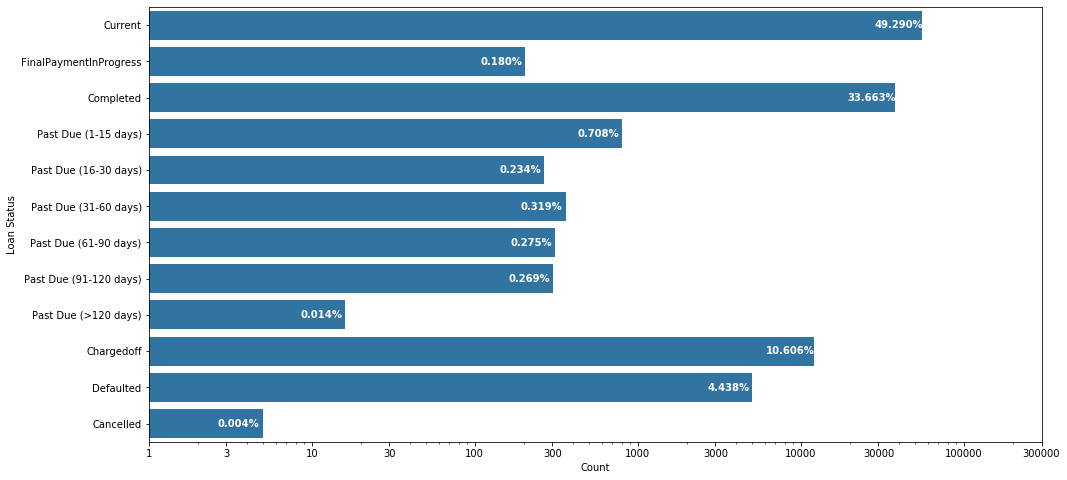

In [189]:
status_items = df['LoanStatus'].value_counts()
total = df.shape[0]

plt.figure(figsize=[16, 8]);
base_color = sb.color_palette()[0]
ax = sb.countplot(data = df, y = 'LoanStatus', color = base_color);
plt.xscale('log');
x_ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000]
plt.xticks(x_ticks, x_ticks);
plt.xlabel('Count');
plt.ylabel('Loan Status');
status_counts_name = status_items.index
rects = ax.patches
texts = ['{:0.3f}%'.format(100*status_items[i]/total) for i in range(status_items.shape[0])]

for rect, text in zip(rects, texts):
    height = rect.get_height()
    width = rect.get_width()
    ax.text(width/1.4, rect.get_y()+rect.get_height()/2, text, color='white', fontweight='bold', ha='center', va='center')

#### Above plot shows that about 50% loans are current, about 34% are completed or close to completion, about 1.75% of the loans are past due in payment, a little over 10% have been charged off and a little over 4% of the loans are defaulted.

#### I will be studying the Charged Off and Defaulted loans for various attributes to see if I can find any patterns.

> Plot of Loans by State.

In [190]:
#Checking for missing states data
df['BorrowerState'].isnull().sum()

5515

In [191]:
df.shape

(113066, 81)

In [192]:
#Dropping rows where BorrowerState is null.
df = df.drop(index=df[df['BorrowerState'].isnull()].index)

In [193]:
df.shape

(107551, 81)

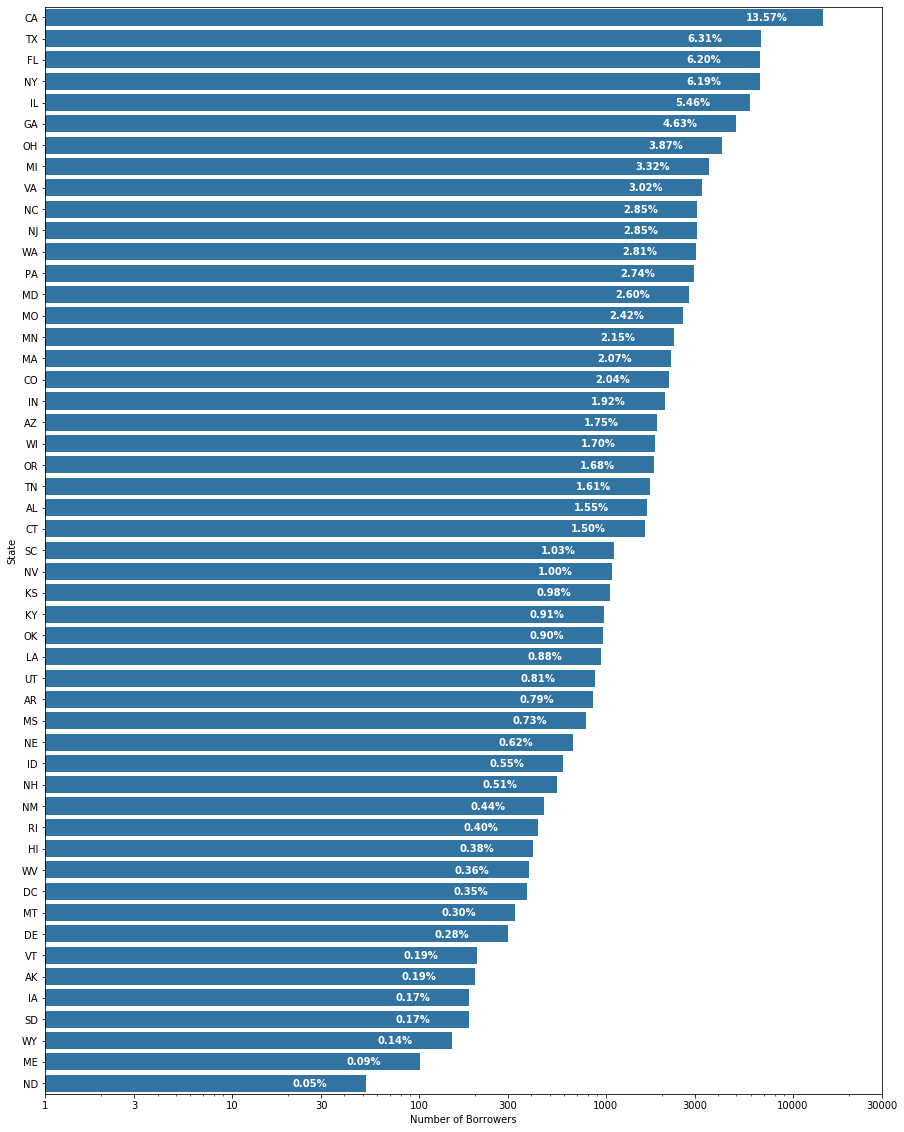

In [194]:
plt.figure(figsize=[15, 20]);
base_color = sb.color_palette()[0]
#ax = sb.countplot(data = df, y = 'BorrowerState', order=np.sort(df['BorrowerState'].value_counts().index), color = base_color);
ax = sb.countplot(data = df, y = 'BorrowerState', order=df['BorrowerState'].value_counts(ascending=False).index, color = base_color);
plt.xscale('log');
x_ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000]
plt.xticks(x_ticks, x_ticks);
plt.xlabel('Number of Borrowers');
plt.ylabel('State');

borrower_state = df['BorrowerState'].value_counts(ascending=False).values
borrower_total = borrower_state.sum()

rects = ax.patches
texts = ['{:0.2f}%'.format(100*borrower_state[i]/borrower_total) for i in range(borrower_state.shape[0])]

for rect, text in zip(rects, texts):
    height = rect.get_height()
    width = rect.get_width()
    ax.text(width/2, rect.get_y()+rect.get_height()/2, text, color='white', fontweight='bold', ha='center', va='center')

Maximum number of loans are made in California, followed by Texas, Florida and New York.

> Combining loans into fewer buckets 
* "Active"('Current'), 
* "Completed"('FinalPaymentInProgress' and 'Completed'), 
* "Delinquent"(All the 'Past Due' loans), 
* "Chargedoff"('Chargedoff'), 
* "Defaulted"('Defaulted')
* Ignoring 'Cancelled' loans since they repesent only 0.002% of the data. (Deleting loans with 'Cancelled' status).

In [195]:
#df['loan_status_cond'] = 'In Trouble'
#df.loc[(df['LoanStatus'].isin(['Current', 'FinalPaymentInProgress', 'Completed'])), 'loan_status_cond'] = 'In Good Standing'
#df.head()

In [196]:
#Deleting loans with 'Cancelled' status
df = df.drop(index=df[df['LoanStatus'] == 'Cancelled'].index)

In [197]:
df['loan_status_cond'] = 'Delinquent'
df.loc[(df['LoanStatus'] == 'Current'), 'loan_status_cond'] = 'Active'
df.loc[(df['LoanStatus'].isin(['FinalPaymentInProgress', 'Completed'])), 'loan_status_cond'] = 'Completed'
df.loc[(df['LoanStatus'] == 'Chargedoff'), 'loan_status_cond'] = 'Chargedoff'
df.loc[(df['LoanStatus'] == 'Defaulted'), 'loan_status_cond'] = 'Defaulted'

> Plotting Proportion of Charged Off and Defaulted Loans compared to all the loans made in a State.

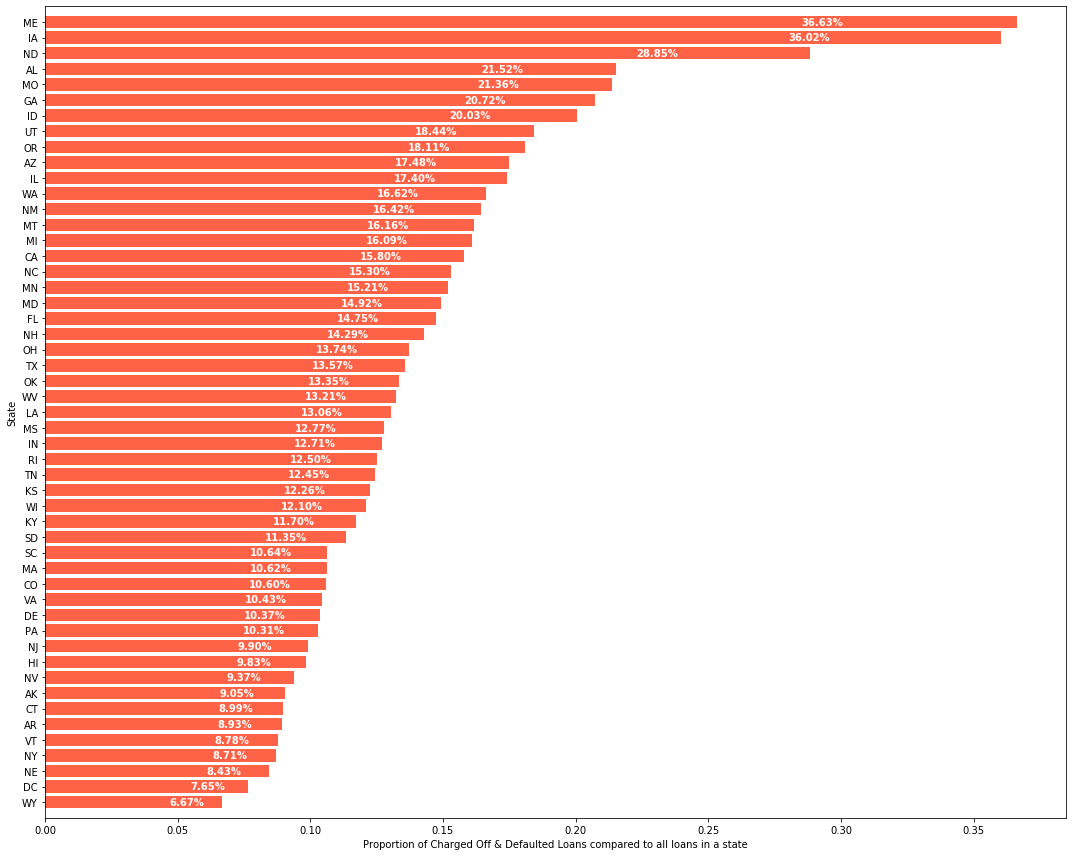

In [198]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

state_dict = {}
keys = df['BorrowerState'].value_counts().index

for i in keys:
    state_dict[i] = df[(df['loan_status_cond'].isin(['Defaulted', 'Chargedoff'])) & (df['BorrowerState']==i)]['BorrowerState'].count()/df[df['BorrowerState']==i]['BorrowerState'].count()

sorted_list = sorted(state_dict.items(), key=lambda x: x[1], reverse=False)

y = []
lengths = []

for i in range(len(sorted_list)):
    y.append(sorted_list[i][0])
    lengths.append(sorted_list[i][1])

fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(1, 1, 1)
ax.barh(y, lengths, color='tomato');
ax.set_xlabel('Proportion of Charged Off & Defaulted Loans compared to all loans in a state');
ax.set_ylabel('State');
ax.set_ylim(-1, 51);

rects = ax.patches
texts = ['{:0.2f}%'.format(100*lengths[i]) for i in range(len(lengths))]

for rect, text in zip(rects, texts):
    height = rect.get_height()
    width = rect.get_width()
    ax.text(width-width/5, rect.get_y()+rect.get_height()/2, text, color='white', fontweight='bold', 
            ha='center', va='center')

fig.tight_layout()
plt.show()

##### Whoa! 36% of the loans made in Maine and Iowa are in trouble, followed closely by North Dakota at 28%! Luckily Prosper makes fewer loans in these states overall.


> Let's look at the distribution of 'In Trouble' loans ('Defaulted', 'Chargedoff' & 'Delinquent') in the top 5 states where Prosper makes the largest number of loans (California, Texas, Florida, New York and Illinois)

In [199]:
df[(df['BorrowerState'] == 'CA') & (df['loan_status_cond'] == 'Delinquent')]['ListingNumber'].count()

206

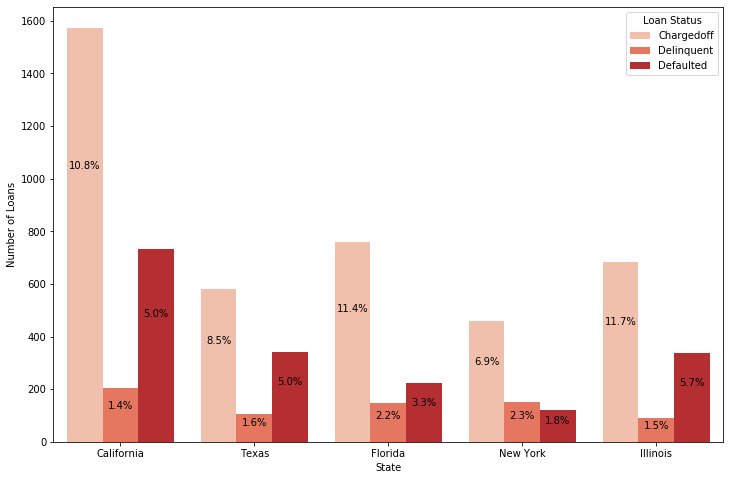

In [200]:
top_states = df[(df['BorrowerState'].isin(['CA', 'TX', 'FL', 'NY', 'IL'])) & (df['loan_status_cond'].isin(['Defaulted', 'Chargedoff', 'Delinquent']))]
plt.figure(figsize=[12, 8]);
ax = sb.countplot(data = top_states, x = 'BorrowerState', order=['CA', 'TX', 'FL', 'NY', 'IL'], hue='loan_status_cond', palette = 'Reds');
plt.legend(title='Loan Status', loc='best');
plt.xlabel('State');
plt.ylabel('Number of Loans');
plt.xticks([0,1,2,3,4], ['California', 'Texas', 'Florida', 'New York', 'Illinois']);

state = ['CA', 'TX', 'FL', 'NY', 'IL']
status = ['Chargedoff', 'Delinquent', 'Defaulted']
prop = []

for stat in status:
    for st in state:
        st_total = df[df['BorrowerState'] == st]['ListingNumber'].count()
        prop.append(df[(df['BorrowerState'] == st) & (df['loan_status_cond'] == stat)]['ListingNumber'].count()/st_total)

rects = ax.patches
texts = ['{:0.1f}%'.format(100*prop[i]) for i in range(len(prop))]

for rect, text in zip(rects, texts):
    height = rect.get_height()
    width = rect.get_width()
    ax.text(rect.get_x()+width/2, rect.get_y()+rect.get_height()/1.5, text, color='black', 
            ha='center', va='center')

#### This chart tells us that the proportion of "In trouble" loans is pretty high in the states where Prosper makes the largest number of loans too.

> Plot for Loans made in different years

In [201]:
df['ListingCreationDate'].isnull().sum()

0

In [202]:
listings_by_year = df.groupby(df['ListingCreationDate'].dt.year)['ListingNumber'].count()

In [203]:
total = df['ListingCreationDate'].count()

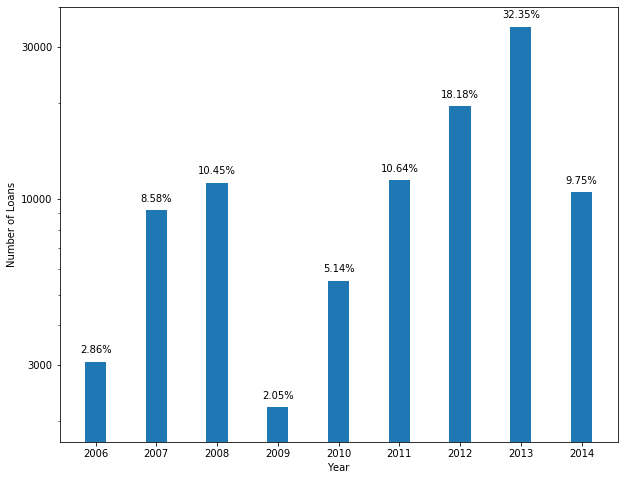

In [235]:
width = 0.35
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()
plt.yscale('log');
x_ticks = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
plt.xticks(x_ticks, x_ticks);
y_ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000]
plt.yticks(y_ticks, y_ticks);
plt.xlabel('Year');
plt.ylabel('Number of Loans');
rects = ax.bar(listings_by_year.index, listings_by_year.values, width);
texts = ['{:0.2f}%'.format(100*listings_by_year.iloc[i]/total) for i in range(listings_by_year.shape[0])]

for rect, text in zip(rects, texts):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.05*height, text, ha='center', va='bottom');

plt.show()

> Least number of loans were made in 2009, at the height of the great recession and maximum number of loans were made in 2013 as the recovery was underway.

> Now plotting the number of loans by year and loan status using a stacked bar chart

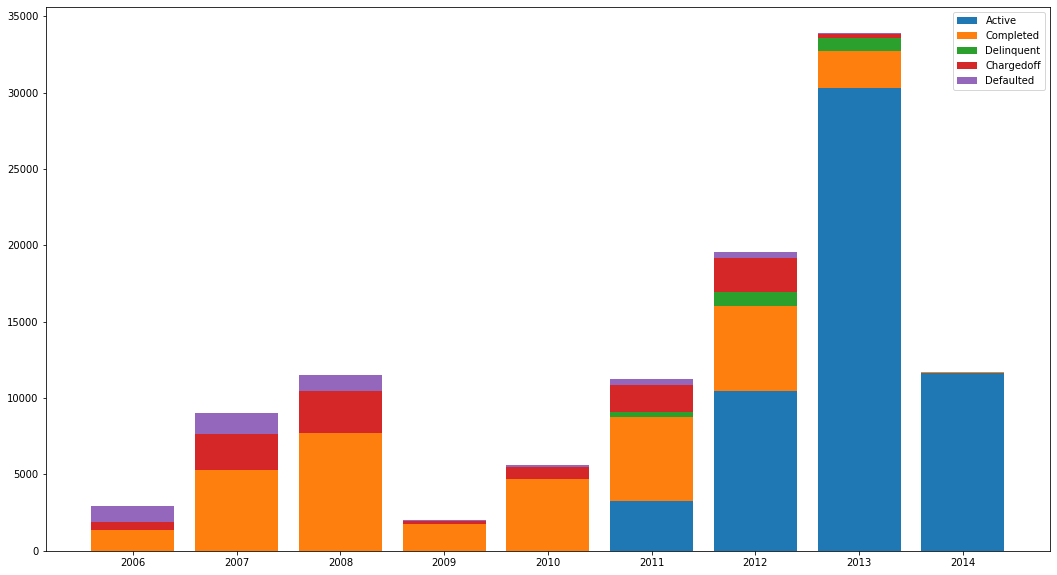

In [236]:

cat1_order = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
cat2_order = ['Active','Completed','Delinquent','Chargedoff','Defaulted']

listings_by_year = df.groupby(df['ListingCreationDate'].dt.year)['ListingNumber'].count()

plt.figure(figsize = [18, 10])

plt.subplot(1, 1, 1)

baselines = np.zeros(len(cat1_order))

for i in range(len(cat2_order)):
    cat2 = cat2_order[i]
    inner_counts = df[df['loan_status_cond'] == cat2]['LoanOriginationDate'].dt.year.value_counts()
    for yr in cat1_order:
        if yr in inner_counts.index:
            continue
        else:
            inner_counts[yr] = 0
    plt.bar(x = np.arange(len(cat1_order)), height = inner_counts[cat1_order],
            bottom = baselines);
    baselines += inner_counts[cat1_order]

plt.xticks(np.arange(len(cat1_order)), cat1_order)
plt.legend(cat2_order);

> A larger proportion of Charged Off & Defaulted loans are observed from 2006 through 2008

#### Next we will be studying the loans distributed by the categories for which the borrowers said they were taking the loans.

In [237]:
listingcategory = pd.Series(['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 'Student Use', 'Auto', 'Other', 'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 'Household Expenses', 'Large Purchases', 'Medical/Dental', 'Motorcycle', 'RV', 'Taxes', 'Vacation', 'Wedding Loans'])

In [239]:
listingcategory_val = df.groupby(df['ListingCategory (numeric)'])['ListingNumber'].count()

In [245]:
total = df['ListingNumber'].count()

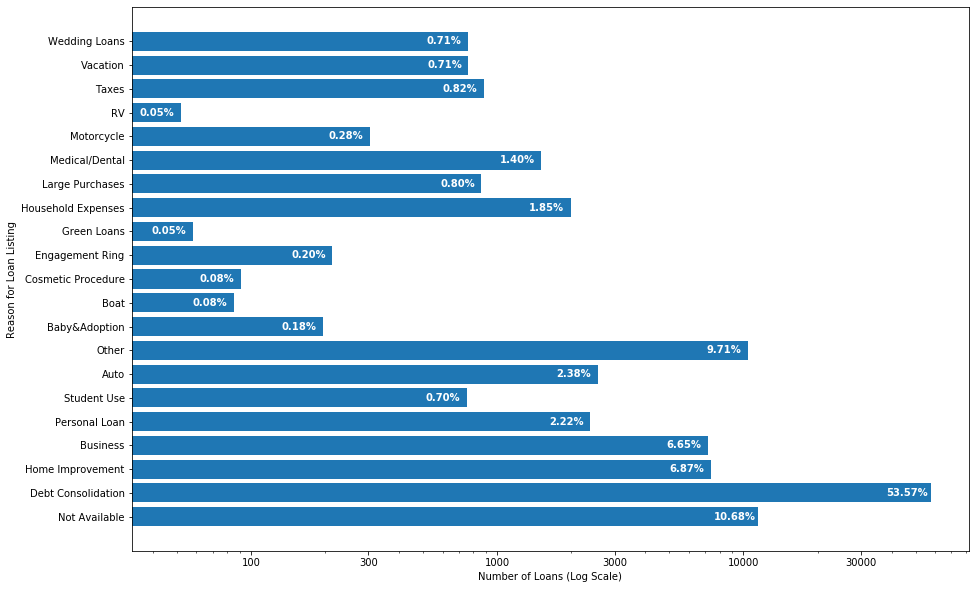

In [247]:
width = 0.8
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()
plt.xscale('log');
x_ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000]
plt.xticks(x_ticks, x_ticks);
plt.ylabel('Reason for Loan Listing');
plt.xlabel('Number of Loans (Log Scale)');
rects = ax.barh(listingcategory.values, listingcategory_val.values, width);

texts = ['{:0.2f}%'.format(100*listingcategory_val.iloc[i]/total) for i in range(listingcategory_val.shape[0])]

for rect, text in zip(rects, texts):
    height = rect.get_height()
    width = rect.get_width()
    ax.text(width-width/5, rect.get_y()+rect.get_height()/2, text, color='white', fontweight='bold', 
            ha='center', va='center')

plt.show()

> Over 50% of the loans were taken out for consolidating debt, which is not a good sign.

#### Next we will see if the borrower being a homeowner shows is of significance.

In [261]:
# Check if borrower is a home owner
df.IsBorrowerHomeowner.value_counts()

True     55344
False    52205
Name: IsBorrowerHomeowner, dtype: int64

#### Since the data is almost evenly split between homeowners and non-homeowners, let's plot the Loan Status by home ownership.

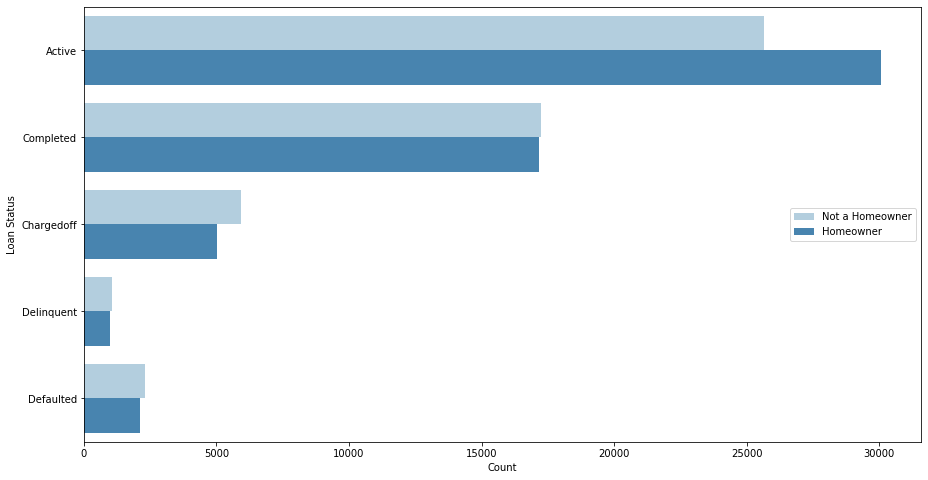

In [272]:
plt.figure(figsize=[15, 8]);
ax = sb.countplot(data = df, y = 'loan_status_cond', hue='IsBorrowerHomeowner', palette = 'Blues');
#plt.xscale('log');
#x_ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]
#plt.xticks(x_ticks, x_ticks);
plt.xlabel('Count');
plt.ylabel('Loan Status');
plt.legend(['Not a Homeowner','Homeowner'], title='', loc='center right');

#### Greater number of loans of non-homeowners are "In Trouble" but the difference between Home owners vs Non-Home owners is not very large.

#### Next we will see if the borrower's income being verifiable is of significance.

In [324]:
# Check if Income Verifiable
df.IncomeVerifiable.value_counts()

True     99008
False     8452
Name: IncomeVerifiable, dtype: int64

In [325]:
df[df['LoanStatus'].isin(['Current', 'FinalPaymentInProgress', 'Completed'])]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,loan_status_cond
34869,91303592830657779899A4D,1000010,2013-11-07 08:48:36.417,NaN,60,Current,NaT,0.20347,0.1795,0.1695,0.15767,0.0774,0.08027,4.0,C,5.0,1,CA,Analyst,Employed,299.0,True,False,NaN,2013-12-02 12:59:47.000,700.0,719.0,1996-10-24 00:00:00,11.0,10.0,27.0,9,272.0,1.0,3.0,1.0,15875.0,2.0,0.0,0.0,12381.0,0.42,16448.0,24.0,0.87,3.0,0.06,"$100,000+",True,9583.333333,ECBF37002223098965D5BCE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,3,120811,13000,2013-12-09,Q4 2013,A636369868383587796DADB,329.76,653.1268,265.15,387.9768,-21.97,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,Active
73298,FF7235942988350144D0D23,1000015,2013-11-16 14:12:28.577,NaN,36,FinalPaymentInProgress,NaT,0.33215,0.2925,0.2825,0.25691,0.1475,0.10941,2.0,E,2.0,7,UT,Other,Employed,61.0,True,False,NaN,2013-11-16 14:12:28.000,640.0,659.0,1991-03-02 00:00:00,8.0,7.0,35.0,6,189.0,2.0,6.0,2.0,0.0,4.0,1.0,0.0,5137.0,0.94,312.0,25.0,0.88,0.0,0.04,"$75,000-99,999",True,6500.000000,68DB36985465597713176A6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,4,110814,2000,2013-11-19,Q4 2013,068E3699181338417532178,84.08,252.2400,107.46,144.7800,-4.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,3,Completed
12152,A17035940185740923A0005,1000018,2013-11-16 14:14:59.250,NaN,36,Current,NaT,0.17969,0.1435,0.1335,0.12640,0.0524,0.07400,5.0,B,7.0,1,MN,Professional,Employed,98.0,True,False,NaN,2013-11-16 14:15:02.000,720.0,739.0,1990-07-21 00:00:00,11.0,11.0,40.0,6,388.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,18219.0,0.37,30107.0,32.0,1.00,0.0,0.35,"$50,000-74,999",True,5000.000000,E4C9369851108853170C2D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,3,119210,3000,2013-12-02,Q4 2013,ED1F3697888837106776FC2,103.04,309.1200,205.26,103.8600,-7.24,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,Active
43473,C45A3595706307490409D94,1000045,2013-11-16 15:00:15.290,NaN,36,Current,NaT,0.19859,0.1620,0.1520,0.14311,0.0599,0.08321,5.0,B,5.0,1,WI,Clerical,Employed,13.0,False,False,NaN,2013-11-16 15:00:17.000,680.0,699.0,1999-08-13 00:00:00,12.0,12.0,21.0,5,380.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,19079.0,0.61,11966.0,21.0,0.95,1.0,0.29,"$25,000-49,999",True,2833.333333,95DA36996318949059945B9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,4,111111,10000,2013-11-20,Q4 2013,144D3698846585026778E67,352.56,1053.2416,658.39,394.8516,-24.65,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,Active
89220,41363381520351779915A4C,100005,2007-02-15 11:26:46.260,C,36,Completed,2009-09-01,0.06174,0.0550,0.0450,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,F

In [326]:
ver_inc_true_total = df[df['IncomeVerifiable'] == True]['loan_status_cond'].count()
ver_inc_false_total = df[df['IncomeVerifiable'] == False]['loan_status_cond'].count()

In [327]:
# Plotting the proportion of loans for various Loan Statuses based on the Income Verifiable flag.
s1 = pd.Series(df[df['IncomeVerifiable'] == True]['loan_status_cond'].value_counts()/ver_inc_true_total, name='s1')
s2 = pd.Series(df[df['IncomeVerifiable'] == False]['loan_status_cond'].value_counts()/ver_inc_false_total, name='s2')

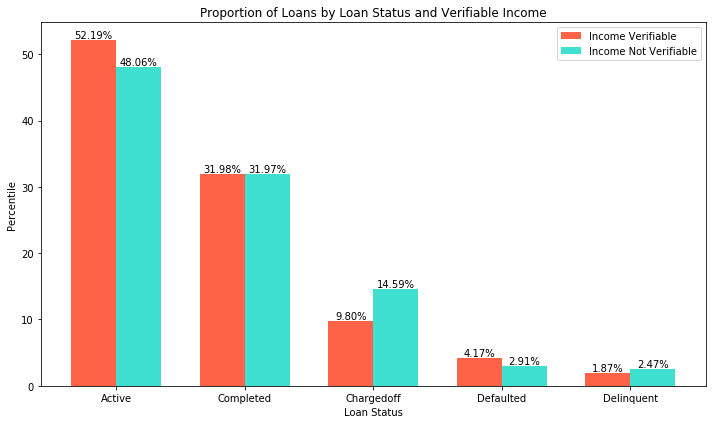

In [328]:
x = np.arange(len(s1.index))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6));
rects1 = ax.bar(x - width/2, s1.values*100, width, label='Income Verifiable', color='tomato');
rects2 = ax.bar(x + width/2, s2.values*100, width, label='Income Not Verifiable', color='turquoise');

ax.set_ylabel('Percentile')
ax.set_title('Proportion of Loans by Loan Status and Verifiable Income')
ax.set_xticks(x)
ax.set_xticklabels(s1.index)
ax.set_xlabel('Loan Status')
ax.legend();

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.2f}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    #xytext=(0, -15),  # 3 points vertical offset
                    #textcoords="offset points", color='white',# fontweight='bold',
                    color='black',
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

#### Proportion of "Charged Off" and "Delinquent" loans for "Not Verifiable Income" loans is greater than those for "Verifiable Income" loans. Surprisingly there are a greater proportion of "Income Verified" Defaulted loans than "Income Not Verified" Defaulted loans.

#### Next we will see plot of the borrower's credit scores.

In [329]:
df[['CreditScoreRangeLower', 'CreditScoreRangeUpper']].min()

CreditScoreRangeLower    420.0
CreditScoreRangeUpper    439.0
dtype: float64

In [330]:
df.shape

(107460, 82)

In [331]:
df.drop(index = df[(df['CreditScoreRangeLower'] <= 0) | (df['CreditScoreRangeUpper'] <= 19)].index, inplace=True)

In [332]:
df.shape

(107460, 82)

In [333]:
df['creditScore_calculated'] = np.ceil((df['CreditScoreRangeLower'] + df['CreditScoreRangeUpper'])/2)

In [334]:
df['creditScore_calculated'].describe()

count    107460.000000
mean        699.190955
std          59.657876
min         430.000000
25%         670.000000
50%         690.000000
75%         730.000000
max         890.000000
Name: creditScore_calculated, dtype: float64

In [335]:
df['creditScore_calculated'].isnull().values.any()

False

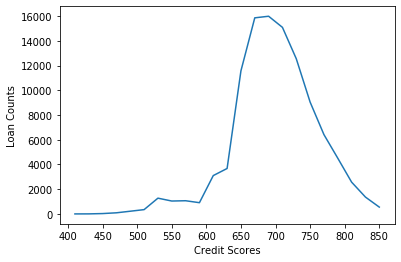

In [336]:
bin_edges = np.arange(400, 870, 20)

bin_centers = bin_edges[:-1]+10

credscore_binned = pd.cut(df['creditScore_calculated'], bin_edges, include_lowest=True)

credscore_cnt = df['ListingKey'].groupby(credscore_binned).count()
plt.errorbar(x=bin_centers, y=credscore_cnt);
plt.xlabel('Credit Scores');
plt.ylabel('Loan Counts');
x_ticks = [400,450,500,550,600,650,700,750,800,850]
plt.xticks(x_ticks);

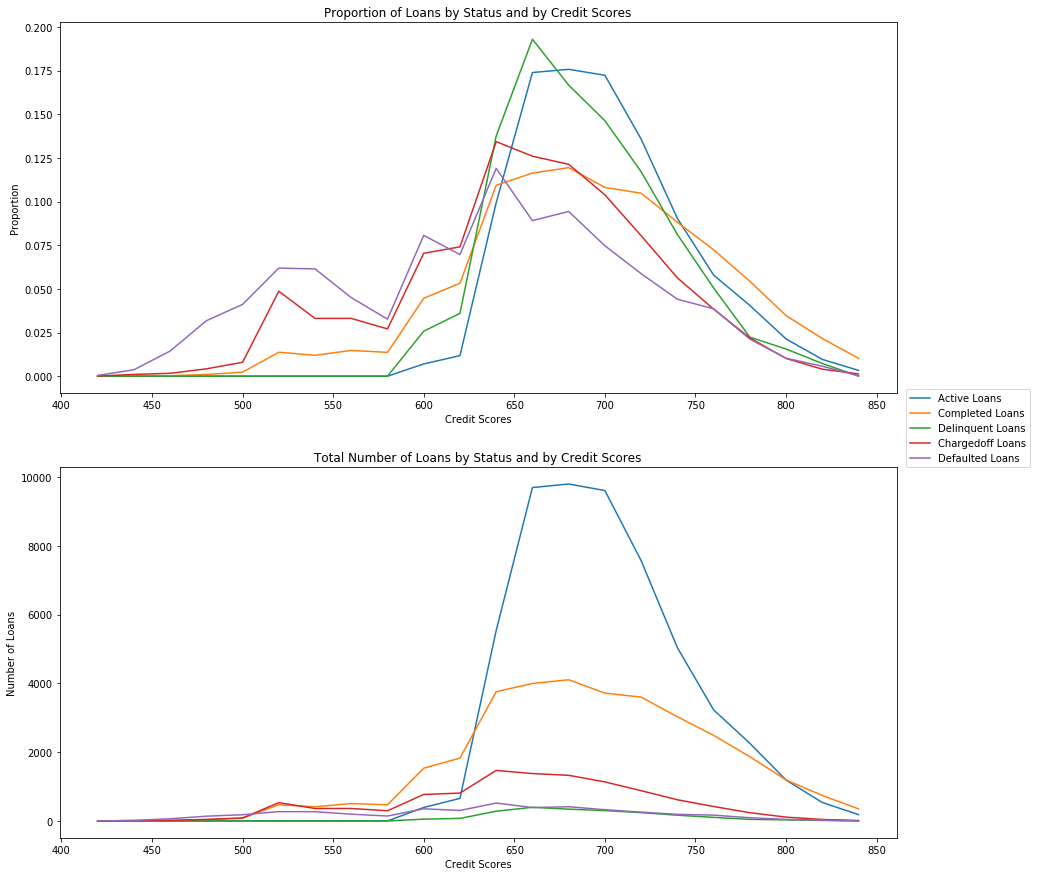

In [514]:
#Checking for the different types of Loan statuses based on credit scores.
bin_edges = np.arange(410, 870, 20)

bin_centers = bin_edges[:-1]+10

credscore_binned = pd.cut(df['creditScore_calculated'], bin_edges, include_lowest=True)

stat_order = ['Active','Completed','Delinquent','Chargedoff','Defaulted']

loan_sts_cnt = df.groupby([credscore_binned, df['loan_status_cond']])['loan_status_cond'].count().groupby(level=1)

plt.figure(figsize = [15, 15])
plt.subplot(2, 1, 1)
for stat in stat_order:
    stat_str = stat
    stat = loan_sts_cnt.get_group(stat)
    total_loans = df[df['loan_status_cond'] == stat_str]['loan_status_cond'].count()
    stat_prop = stat/total_loans    
    plt.errorbar(x=bin_centers, y=stat_prop, label=stat_str+' Loans');
plt.xlabel('Credit Scores');
plt.ylabel('Proportion');
x_ticks = [400,450,500,550,600,650,700,750,800,850]
plt.xticks(x_ticks);
plt.title('Proportion of Loans by Status and by Credit Scores');
plt.subplot(2, 1, 2)

for stat in stat_order:
    stat_str = stat
    stat = loan_sts_cnt.get_group(stat)
    plt.errorbar(x=bin_centers, y=stat, label=stat_str+' Loans');

plt.xlabel('Credit Scores');
plt.ylabel('Number of Loans');
x_ticks = [400,450,500,550,600,650,700,750,800,850]
plt.xticks(x_ticks);
plt.title('Total Number of Loans by Status and by Credit Scores');
plt.legend(bbox_to_anchor=(1.16, 1), loc='lower right', borderaxespad=0.);

> Unsurprisingly, the data shows more "In Trouble" loans for credit scores that are considered "Bad" (below 700)

## Bivariate Exploration

> Let's plot Borrower rate vs Credit Scores.

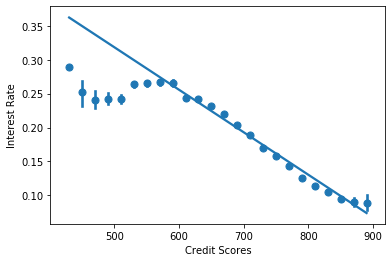

In [548]:
#Borrower rate vs Credit Scores.
sb.regplot(data = df, x = 'creditScore_calculated', y='BorrowerRate',  x_estimator=np.mean);
plt.xlabel('Credit Scores');
plt.ylabel('Interest Rate');

> As expected the mean Interest Rate paid by the borrower on a loan is inversely proportional to th credit scores of the borrower.

# hist2d returns a number of different variables, including an array of counts
bins_x = np.arange(0.5, 10.5+1, 1)
bins_y = np.arange(-0.5, 10.5+1, 1)
h2d = plt.hist2d(data = df, x = 'disc_var1', y = 'disc_var2',
               bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
counts = h2d[0]

# loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 7: # increase visibility on darkest cells
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'black')

> Now let's plot Borrower rate vs Employment Status at the time of the listing of the loan..

In [560]:
df['EmploymentStatus'].value_counts()

Employed         66598
Full-time        24871
Self-employed     5947
Other             3742
Not available     3737
Part-time         1002
Not employed       801
Retired            762
Name: EmploymentStatus, dtype: int64

In [559]:
df['EmploymentStatus'].isnull().sum()

0

In [558]:
#Update null values to "Not available"
df['EmploymentStatus'].fillna(value='Not available', inplace=True)

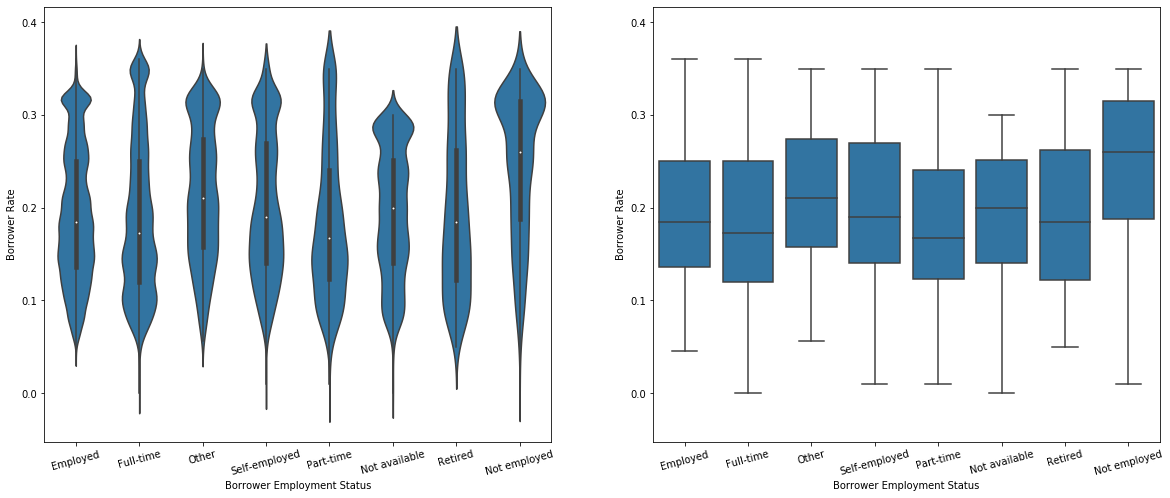

In [561]:
#Employment Status vs Borrower Rate
plt.figure(figsize = [20, 8])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df, x = 'EmploymentStatus', y = 'BorrowerRate', color=base_color);
plt.xticks(rotation=15);
plt.xlabel('Borrower Employment Status');
plt.ylabel('Borrower Rate');

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = df, x = 'EmploymentStatus', y = 'BorrowerRate', color=base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.xticks(rotation=15);
plt.xlabel('Borrower Employment Status');
plt.ylabel('Borrower Rate');

In [ ]:
#Employement Status vs Credit Scores
plt.figure(figsize = [20, 8])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df, x = 'EmploymentStatus', y = 'creditScore_calculated', color=base_color);
plt.xticks(rotation=15);
plt.xlabel('Borrower Employment Status');
plt.ylabel('Borrower Credit Score');

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = df, x = 'EmploymentStatus', y = 'creditScore_calculated', color=base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.xticks(rotation=15);
plt.xlabel('Borrower Employment Status');
plt.ylabel('Borrower Credit Score');

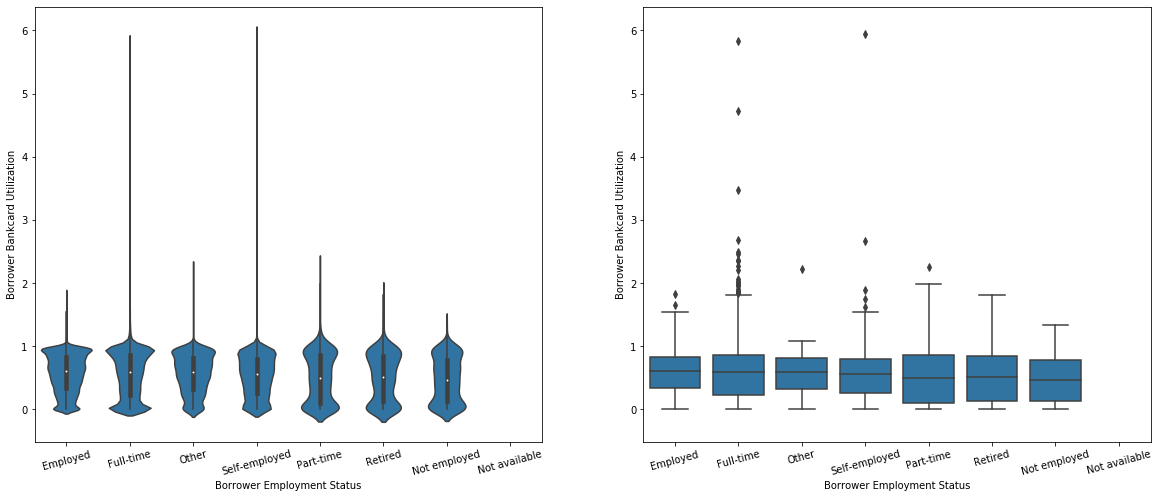

In [65]:
#Employement Status vs Bankcard Utilization

plt.figure(figsize = [20, 8])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df, x = 'EmploymentStatus', y = 'BankcardUtilization', color=base_color);
plt.xticks(rotation=15);
plt.xlabel('Borrower Employment Status');
plt.ylabel('Borrower Bankcard Utilization');

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = df, x = 'EmploymentStatus', y = 'BankcardUtilization', color=base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.xticks(rotation=15);
plt.xlabel('Borrower Employment Status');
plt.ylabel('Borrower Bankcard Utilization');


KeyError: "None of [Index(['$0', 'Not displayed', 'Not employed', '$1-24,999', '$25,000-49,999',\n       '$50,000-74,999', '$75,000-99,999', '$100,000+'],\n      dtype='object')] are in the [index]"

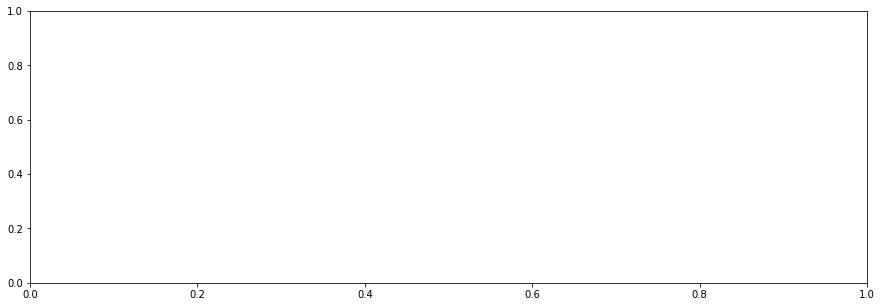

In [66]:
#Plot loans by Income Range and loan condition using stacked bar chart
cat1_order = ['$0', 'Not displayed', 'Not employed', '$1-24,999', '$25,000-49,999', '$50,000-74,999', 
              '$75,000-99,999', '$100,000+']
cat2_order = ['In Good Standing', 'In Trouble']

listings_by_income = df.groupby(df['IncomeRange'])['ListingNumber'].count()

plt.figure(figsize = [15, 5])

plt.subplot(1, 1, 1)

baselines = np.zeros(len(cat1_order))

for i in range(len(cat2_order)):
    cat2 = cat2_order[i]
    inner_counts = df[df['loan_status_cond'] == cat2]['IncomeRange'].value_counts()
    plt.bar(x = np.arange(len(cat1_order)), height = inner_counts[cat1_order],
            bottom = baselines);
    baselines += inner_counts[cat1_order]

plt.xticks(np.arange(len(cat1_order)), cat1_order)
plt.xlabel('Income Range');
plt.ylabel('Loan Count');
plt.legend(cat2_order);

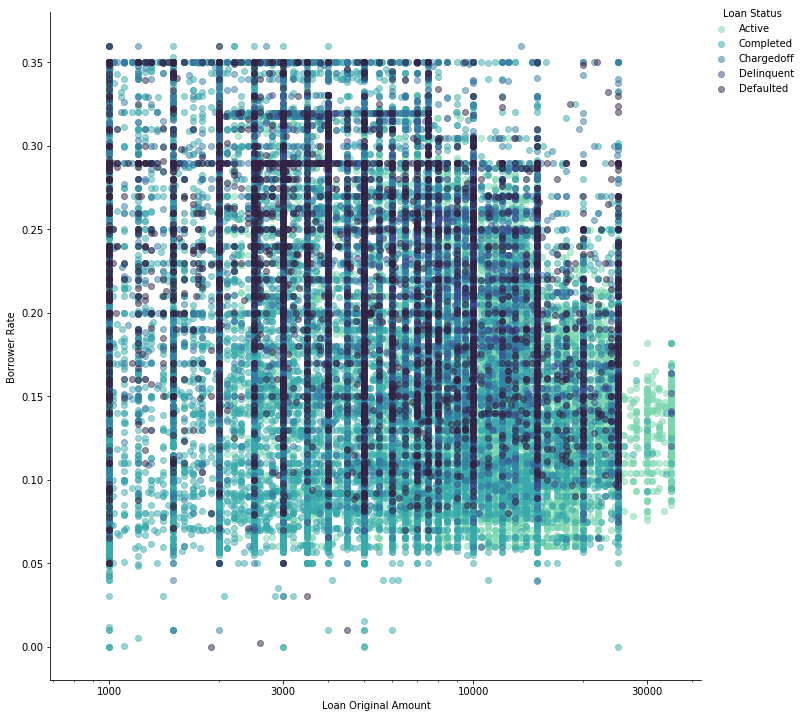

In [67]:
#YOUR CODE HERE
#plt.figure(figsize = [15, 5]);
#plt.scatter(data = df, x = 'LoanOriginalAmount', y = 'BorrowerRate', hue='loan_status_cond');#, c = 'LenderYield', cmap = 'mako_r');

g = sb.FacetGrid(data = df, hue = 'loan_status_cond', height = 10, palette = 'mako_r');
g.map(plt.scatter, 'LoanOriginalAmount','BorrowerRate', alpha=0.5);
g.set(xscale = 'log');
x_ticks = [1000, 3000, 10000, 30000]
g.set(xticks = x_ticks, xticklabels = x_ticks);
g.add_legend(title='Loan Status', loc='upper right');
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrower Rate');

In [68]:
listingcategory = pd.Series(['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 'Student Use', 'Auto', 'Other', 'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 'Household Expenses', 'Large Purchases', 'Medical/Dental', 'Motorcycle', 'RV', 'Taxes', 'Vacation', 'Wedding Loans'])

In [69]:
listingcategory_val = df[df['loan_status_cond'] == 'In Trouble'].groupby(df['ListingCategory (numeric)'])['ListingNumber'].count()
total = df[df['loan_status_cond'] == 'In Trouble']['ListingNumber'].count()
listingcategory_val.sort_values(inplace=True)
listingcategory_sorted = [listingcategory[i] for i in listingcategory_val.index]

ValueError: min() arg is an empty sequence

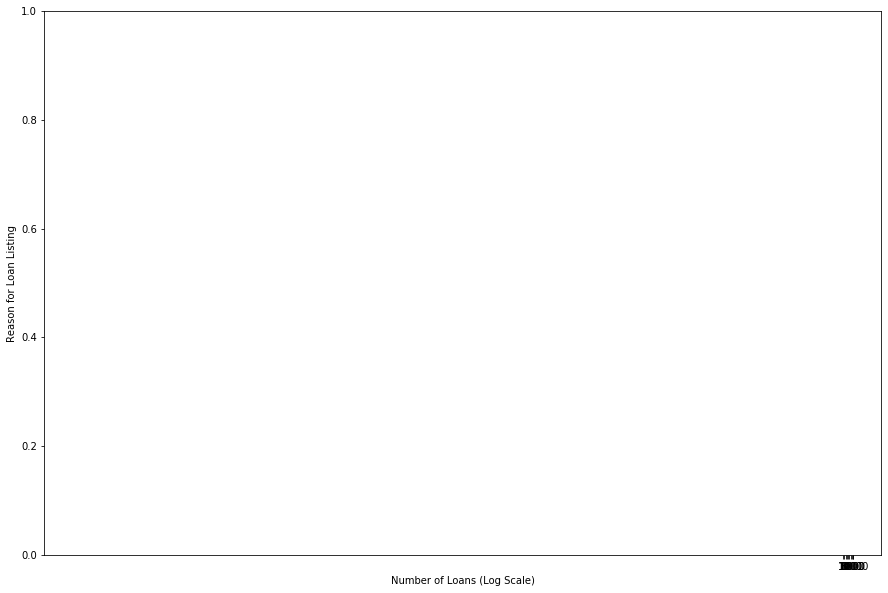

In [70]:
# Loans in Trouble by Loan Category
height = 0.5
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()
plt.xscale('log');
x_ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 6000, 10000]
plt.xticks(x_ticks, x_ticks);
plt.ylabel('Reason for Loan Listing');
plt.xlabel('Number of Loans (Log Scale)');
rects = ax.barh(listingcategory_sorted, listingcategory_val.values, height, color='c', label='Loans in Trouble', alpha=0.5);

rects = ax.patches
texts = ['{:0.2f}%'.format(100*listingcategory_val[i]/total) for i in listingcategory_val.index]

for rect, text in zip(rects, texts):
    height = rect.get_height()
    width = rect.get_width()
    ax.text(width/1.3, rect.get_y()+rect.get_height()/2, text, color='white', fontweight='bold', ha='center', va='center')

plt.legend(loc='center right');
plt.show()

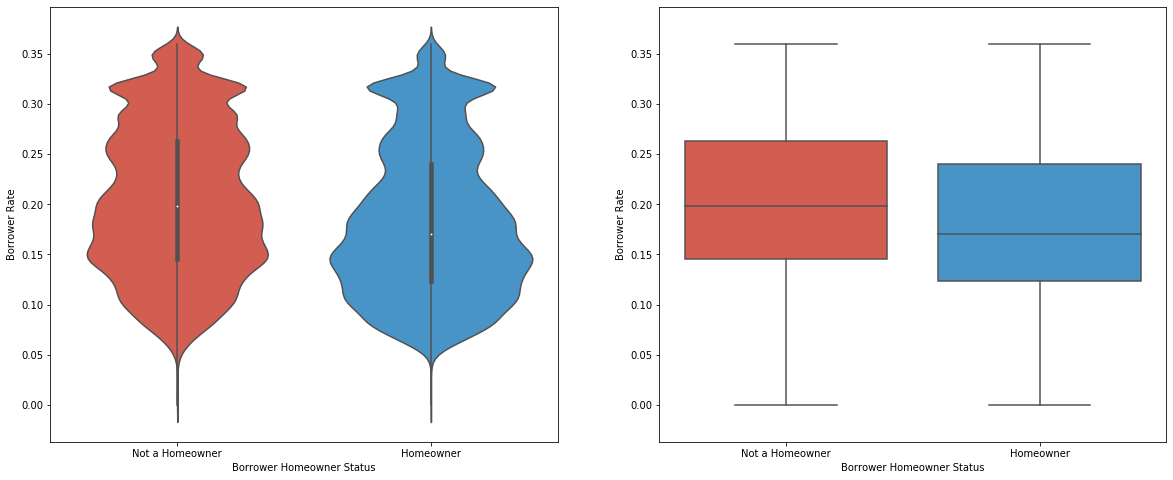

In [71]:
#Violin Plot for Borrower Rate by Homeowner status
plt.figure(figsize = [20, 8])
#base_color = sb.color_palette()[0]
flatui = ["#e74c3c", "#3498db"]
# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df, x = 'IsBorrowerHomeowner', y = 'BorrowerRate', palette=flatui);
plt.xticks([0,1], ['Not a Homeowner', 'Homeowner']);
plt.xlabel('Borrower Homeowner Status');
plt.ylabel('Borrower Rate');

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = df, x = 'IsBorrowerHomeowner', y = 'BorrowerRate', palette=flatui)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.xticks([0,1], ['Not a Homeowner', 'Homeowner']);
plt.xlabel('Borrower Homeowner Status');
plt.ylabel('Borrower Rate');

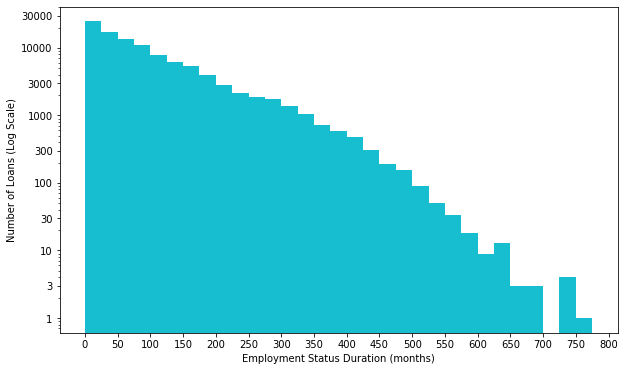

In [72]:
#Histogram for the length in months of the employment status at the time the listing was created
plt.figure(figsize=[10, 6]);
base_color = sb.color_palette()[9]
bin_edges = np.arange(0, df['EmploymentStatusDuration'].max()+25, 25)
plt.hist(df['EmploymentStatusDuration'], bins=bin_edges, color = base_color);
plt.yscale('log');
y_ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000]
plt.yticks(y_ticks, y_ticks);
x_ticks = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]
plt.xticks(x_ticks, x_ticks);
plt.xlabel('Employment Status Duration (months)');
plt.ylabel('Number of Loans (Log Scale)');

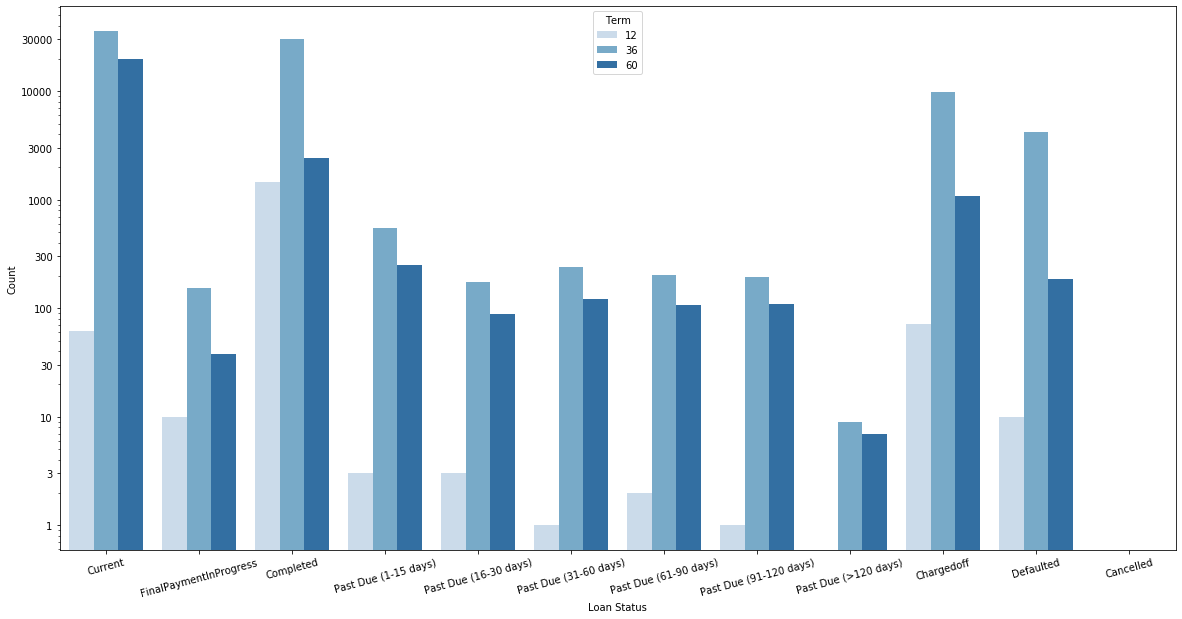

In [73]:
# Bar plot for Loan Status based on the Term of the Loan.
plt.figure(figsize=[20, 10]);
sb.countplot(data = df, x = 'LoanStatus', hue='Term', palette = 'Blues');
plt.yscale('log');
y_ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000]
plt.yticks(y_ticks, y_ticks);
plt.xticks(rotation=15)
plt.ylabel('Count');
plt.xlabel('Loan Status');

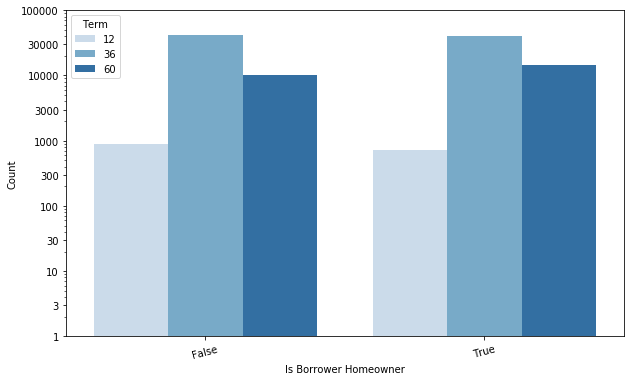

In [74]:
# Bar plot for is Borrower a Homeowner based on the Term of the Loan.
plt.figure(figsize=[10, 6]);
sb.countplot(data = df, x = 'IsBorrowerHomeowner', hue='Term', palette = 'Blues');
plt.yscale('log');
y_ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]
plt.yticks(y_ticks, y_ticks);
plt.xticks(rotation=15)
plt.ylabel('Count');
plt.xlabel('Is Borrower Homeowner');

In [ ]:
# For loans that have defaulted, plot by term and principal amount
loan_defaulted = df[df['LoanStatus'] == 'Defaulted']
plt.figure(figsize=[10, 6]);
sb.countplot(data = df, x = 'Term', palette = 'Blues');
#plt.yscale('log');

In [ ]:
#df['StatedMonthlyIncome'].describe()
df[df['StatedMonthlyIncome']>=10000].StatedMonthlyIncome.count(), df[df['StatedMonthlyIncome']<10000].StatedMonthlyIncome.count(), df[(df['StatedMonthlyIncome']<10000) & (df['loan_status_cond'] == 'In Trouble')].StatedMonthlyIncome.count()

In [ ]:
plt.figure(figsize=[10, 6]);
plt.hist(df[(df['StatedMonthlyIncome']<10000)].StatedMonthlyIncome,bins=20, alpha=0.5);
x_ticks = [i for i in range(0,11000,1000)]
plt.xticks(x_ticks);

In [ ]:
plt.figure(figsize=[10, 6]);
plt.hist(df[(df['StatedMonthlyIncome']<10000) & (df['loan_status_cond'] == 'In Trouble')].StatedMonthlyIncome,bins=20, alpha=0.5);
x_ticks = [i for i in range(0,11000,1000)]
plt.xticks(x_ticks);

In [ ]:
plt.figure(figsize=[10, 6]);
plt.hist(df['LoanMonthsSinceOrigination'], bins=20, alpha=0.5);

In [ ]:
loan_defaulted = df[df['LoanStatus'] == 'Defaulted']

bin_edges = np.arange(0, 105, 5)
bin_centers = bin_edges[:-1]+2.5
monthsinceorigin_binned = pd.cut(loan_defaulted['LoanMonthsSinceOrigination'], bin_edges, include_lowest=True)
#plt.hist(monthsinceorigin_binned['LoanMonthsSinceOrigination'], bins=20, alpha=0.5);
plt.figure(figsize = [15, 15])
sb.countplot(y=monthsinceorigin_binned, orient="h");
#plt.xscale('log');

In [ ]:
bin_edges = np.arange(0, 105, 5)
bin_centers = bin_edges[:-1]+2.5
monthsinceorigin_binned = pd.cut(df['LoanMonthsSinceOrigination'], bin_edges, include_lowest=True)


#total_loans_good = df[df['loan_status_cond'] == 'In Good Standing']['loan_status_cond'].count()
#total_loans_trouble = df[df['loan_status_cond'] == 'In Trouble']['loan_status_cond'].count()
#total_loans = df[df['loan_status_cond'] == 'In Good Standing']['loan_status_cond'].count()


plt.figure(figsize = [15, 15])
plt.subplot(2, 1, 1)
loan_sts_cnt = df.groupby([monthsinceorigin_binned, df['loan_status_cond']])['loan_status_cond'].count()
#print(loan_sts_cnt)
#loan_sts_prop_good = []
#loan_sts_prop_trouble = []
#for i in range(len(loan_sts_cnt)):
#    if i%2 == 0:
#        loan_sts_prop_good.append(loan_sts_cnt[i]/(loan_sts_cnt[i] + loan_sts_cnt[i+1]))
#    else:
#        loan_sts_prop_trouble.append(loan_sts_cnt[i]/(loan_sts_cnt[i] + loan_sts_cnt[i-1]))

plt.errorbar(x=bin_centers, y=loan_sts_cnt, label='Proportion of Loans\n in Good Standing');
plt.errorbar(x=bin_centers, y=loan_sts_prop_trouble, label='Proportion of Loans\n in Trouble');
plt.xlabel('Credit Scores');
plt.ylabel('Proportion');
x_ticks = [400,450,500,550,600,650,700,750,800,850]
plt.xticks(x_ticks);
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

plt.subplot(2, 1, 2)

loan_sts_cnt_good = []
loan_sts_cnt_trouble = []
for i in range(len(loan_sts_cnt)):
    if i%2 == 0:
        loan_sts_cnt_good.append(loan_sts_cnt[i])
    else:
        loan_sts_cnt_trouble.append(loan_sts_cnt[i])

plt.errorbar(x=bin_centers, y=loan_sts_cnt_good, label='Number of Loans in Good Standing');
plt.errorbar(x=bin_centers, y=loan_sts_cnt_trouble, label='Number of Loans in Trouble');
plt.xlabel('Credit Scores');
plt.ylabel('Number of Loans');
x_ticks = [400,450,500,550,600,650,700,750,800,850]
plt.xticks(x_ticks);
plt.legend();

In [ ]:
#Plot loans by Months Since Loan Origination and loan condition using stacked bar chart
cat1_order = [(str(i)+'-'+str(i+5)) for i in range(0,100,5)]
cat2_order = ['In Good Standing', 'In Trouble']

bin_edges = np.arange(0, 105, 5)

bin_centers = bin_edges[:-1]+5

monthsinceorigin_binned = pd.cut(df['LoanMonthsSinceOrigination'], bin_edges, include_lowest=True)


monthssinceorigination = df.groupby(df['LoanMonthsSinceOrigination'])['ListingNumber'].count()

plt.figure(figsize = [15, 5])

plt.subplot(1, 1, 1)

baselines = np.zeros(len(cat1_order))

for i in range(len(cat2_order)):
    cat2 = cat2_order[i]
    inner_counts = df[df['loan_status_cond'] == cat2]['IncomeRange'].value_counts()
    plt.bar(x = np.arange(len(cat1_order)), height = inner_counts[cat1_order],
            bottom = baselines);
    baselines += inner_counts[cat1_order]

plt.xticks(np.arange(len(cat1_order)), cat1_order)
plt.xlabel('Income Range');
plt.ylabel('Loan Count');
plt.legend(cat2_order);

Markdown - Plotting for days taken between listing of a loan and origination of a loan.

# Creating a new column to hold the number of days between listing of loan and origination of loan
df['days_for_loan_origination'] = (df['LoanOriginationDate']- df['ListingCreationDate']).dt.days

Markdown - Plotting for time taken for loan to be given since the time it was listed vs the original loan amount

bin_edges = np.arange(0, df['days_for_loan_origination'].max()+1, 1)
sb.distplot(df['days_for_loan_origination'], bins = bin_edges,
            hist_kws = {'alpha' : 0.5})
#sb.distplot(df['days_for_loan_origination']);
plt.xscale('log');
plt.xlim(1,100);
x_ticks = [1, 3, 10, 30, 100]
plt.xticks(x_ticks, x_ticks);
plt.xlabel('Days for Loan Origination');
#plt.ylabel('distribution');

> Violin Plot for Borrower Rate by Homeowner status